# <font color="red"><h1 align="center"><b>Stock Market Prediction And Forecasting Using Stacked LSTM</b></h1></font>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
tf.__version__

'2.12.0'

In [2]:
df = pd.read_csv('stock.csv', index_col="Date", parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df.isna().any()

Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2 KB


In [7]:
df1=df.reset_index()['Close']

In [8]:
df1[ : 10]

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
5    234.60
6    234.90
7    235.05
8    236.60
9    233.95
Name: Close, dtype: float64

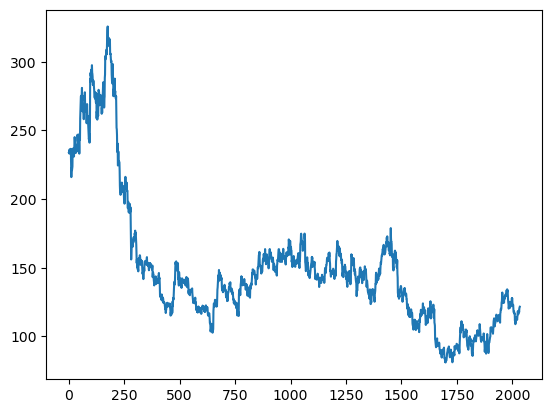

In [9]:
plt.plot(df1);

In [10]:
 # LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1[ :10]

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       [0.63378268],
       [0.62234477],
       [0.62765523],
       [0.62888072],
       [0.62949346],
       [0.63582516],
       [0.625     ]])

In [13]:
# splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size

train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size, test_size

(1322, 713)

In [17]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
X_train.shape

(1221, 100)

In [20]:
X_test.shape

(612, 100)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 12s 302ms/step - loss: 0.0197 - val_loss: 0.0057
Epoch 2/100
20/20 [==============================] - 4s 204ms/step - loss: 0.0029 - val_loss: 9.2864e-04
Epoch 3/100
20/20 [==============================] - 4s 200ms/step - loss: 0.0017 - val_loss: 9.0070e-04
Epoch 4/100
20/20 [==============================] - 4s 214ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 4s 213ms/step - loss: 0.0014 - val_loss: 8.0454e-04
Epoch 6/100
20/20 [==============================] - 4s 206ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 7/100
20/20 [==============================] - 4s 207ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/100
20/20 [==============================] - 4s 221ms/step - loss: 0.0014 - val_loss: 8.6041e-04
Epoch 9/100
20/20 [==============================] - 5s 276ms/step - loss: 0.0012 - val_loss: 9.4451e-04
Epoch 10/100
20/20 [==============================] - 5s 267ms/step - 

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 1s 54ms/step


In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

163.76247945410256

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

115.11540246670567

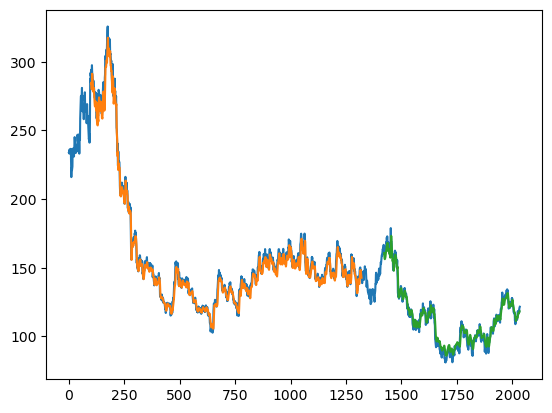

In [31]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# Done ...